**Цель:**

Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

**1. Сгенерирую данные с помощью кода:**

  from sklearn.datasets import make_classification

  x_data_generated, y_data_generated = make_classification(scale=1)

In [ ]:
x_data_generated, y_data_generated = make_classification(scale=1)

#Сгенерю также датафрейм для визуального удобства

X = pd.DataFrame(data = x_data_generated)
y = pd.DataFrame(data = y_data_generated, columns = ['class'])

df = pd.merge(X, y, left_index=True, right_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,0.489724,0.910365,-1.369927,1.094527,1.345249,1.347217,-1.572794,0.646429,-0.968814,-0.572899,...,-1.407308,0.154049,-0.507917,0.830330,-0.476930,0.753778,-0.806632,-0.202882,1.350034,1
1,-0.262657,0.143567,-0.642047,-0.997735,1.821228,-1.515756,-1.832377,-1.539148,1.666246,0.661652,...,-0.255325,1.004531,0.165743,-0.268012,1.760742,-1.925663,1.062400,1.481125,-0.158619,1
2,-0.108948,-1.589724,-0.654019,2.627183,0.709640,0.178950,0.005611,0.976987,-0.815019,0.712939,...,-0.199989,-0.236949,1.064815,1.335863,-0.338874,0.129660,-0.700121,-0.095621,0.038801,1
3,1.052940,-0.576690,0.607372,1.682346,-1.380304,1.111335,0.609801,0.552124,-1.830519,-1.551299,...,1.387709,0.450709,0.347790,0.296936,0.517674,-1.779575,-2.014247,1.324688,0.275353,1
4,0.173518,-0.099631,-0.379726,0.030176,-0.933001,-0.386285,1.536746,1.900879,-1.188756,0.680323,...,0.857322,0.753886,1.637143,1.005551,-1.133601,-0.737785,-0.800297,-0.909127,0.660534,0


**2. Построю модель логистической регрессии и оценю среднюю точность. Для этого использую следующий код:**

  cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()

0.9

**3. Используйте статистические методы для отбора признаков:**

Выберу признаки на основе матрицы корреляции

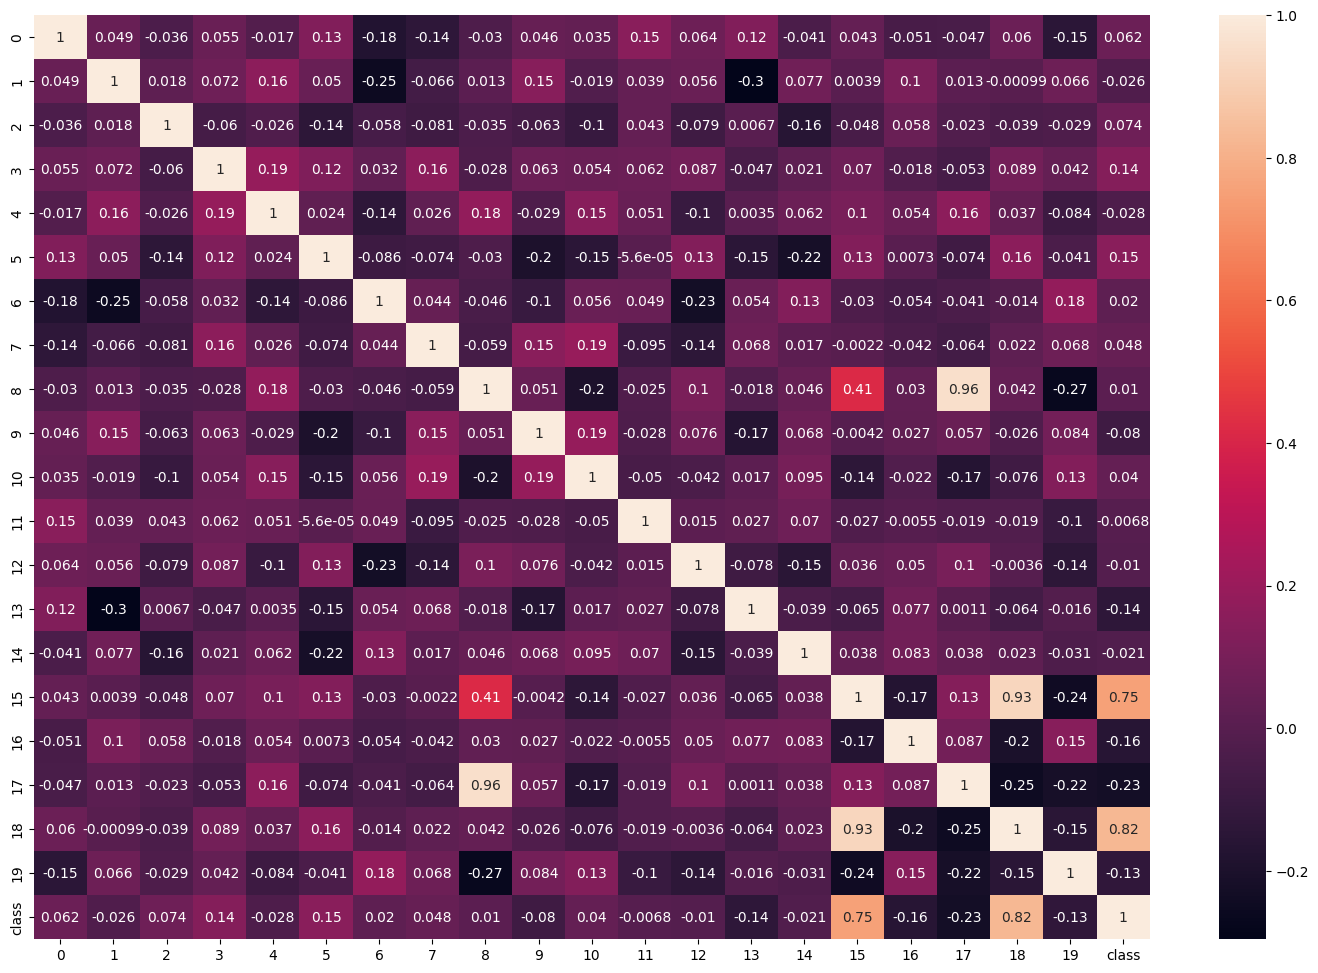

In [ ]:
corr = df.corr()
plt.figure(figsize = (18,12))
sns.heatmap(corr, annot = True)
plt.show()

Вижу, что с целевой переменной наиболее сильно коррелируют признаки 15, 17, 18 - их коэффициент Пирсона с целевой переменной составил более 0.2

Уберу все остальные признаки

In [ ]:
X_corr = df[[15,17,18]]

Отсеку низковариативные признаки (VarianceThreshold)

Для этого сначала оценю дисперсию каждого признака

In [ ]:
X.var().sort_values()

2     0.775422
0     0.800875
11    0.864457
5     0.876861
13    0.937191
14    0.947927
3     0.963191
10    1.003468
19    1.011566
6     1.019433
12    1.036739
7     1.050152
9     1.062983
1     1.193591
16    1.237262
4     1.272684
15    1.364817
17    1.619514
18    1.640651
8     1.910324
dtype: float64

Отберу только те признаки, дисперсия которых превышает 1.4 - то есть 17, 18, 8 - с помощью метода VarianceThreshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(threshold=1.4)
X_var = pd.DataFrame(data = selector.fit_transform(X))

Повторю п. 2 на отобранных признаках в п. 3a, п. 3b

In [ ]:
#Признаки на основе корреляции

cross_val_score(LogisticRegression(), X_corr.values, y_data_generated, scoring='accuracy').mean()

0.93

In [ ]:
#Признаки на основе вариативности

cross_val_score(LogisticRegression(), X_var.values, y_data_generated, scoring='accuracy').mean()

0.9199999999999999

**4. Осуществлю отбор признаков на основе дисперсионного анализа:**

  Выберу 5 лучших признаков с помощью скоринговой функции для классификации f_classif (метод SelectKBest)

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
X_fclassif = SelectKBest(k = 5).fit_transform(x_data_generated,y_data_generated)

Повторю п. 2 на отобранных признаках

In [ ]:
#Признаки отобранные скоринговой функцией для классификации f_classif

cross_val_score(LogisticRegression(), X_fclassif, y_data_generated, scoring='accuracy').mean()

0.9099999999999999

**5. Проведу отбор с использованием моделей:**

  С помощью регуляризации L1. Сначала посмотрю на графике, при каком коэффициенте регуляризации остаются наиболее полезные признаки, и что это за признаки

In [ ]:
from sklearn.linear_model import Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler
from cycler import cycler


import warnings
warnings.filterwarnings('ignore')

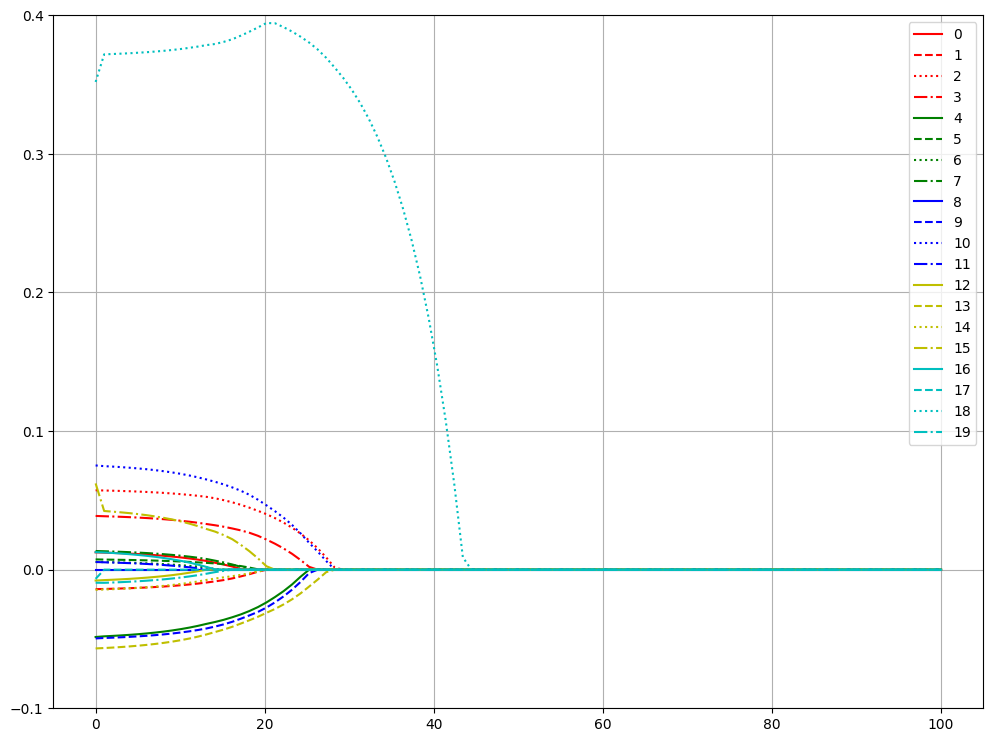

In [ ]:
X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l = list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))



plt.ylim(-0.1,0.4)
plt.legend(X.columns)
plt.grid()
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c', 'k']) *
                           cycler('linestyle', ['-', '--', ':', '-.'])))

Похоже, что можно взять признаки 18, 2, 10, 13, 9, 4, 3

In [ ]:
X_l1reg = X[[2,3,4,9,10,13,18]]

С помощью метода SelectFromModel и логистической регрессии

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

selector = SelectFromModel(LogisticRegression().fit(X, y), prefit = False, max_features = 5, threshold = -np.inf)
X_sfm = selector.fit_transform(X, y)

C помощью модели RandomForest и встроенного атрибута feature_impotance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 1).fit(X, y)

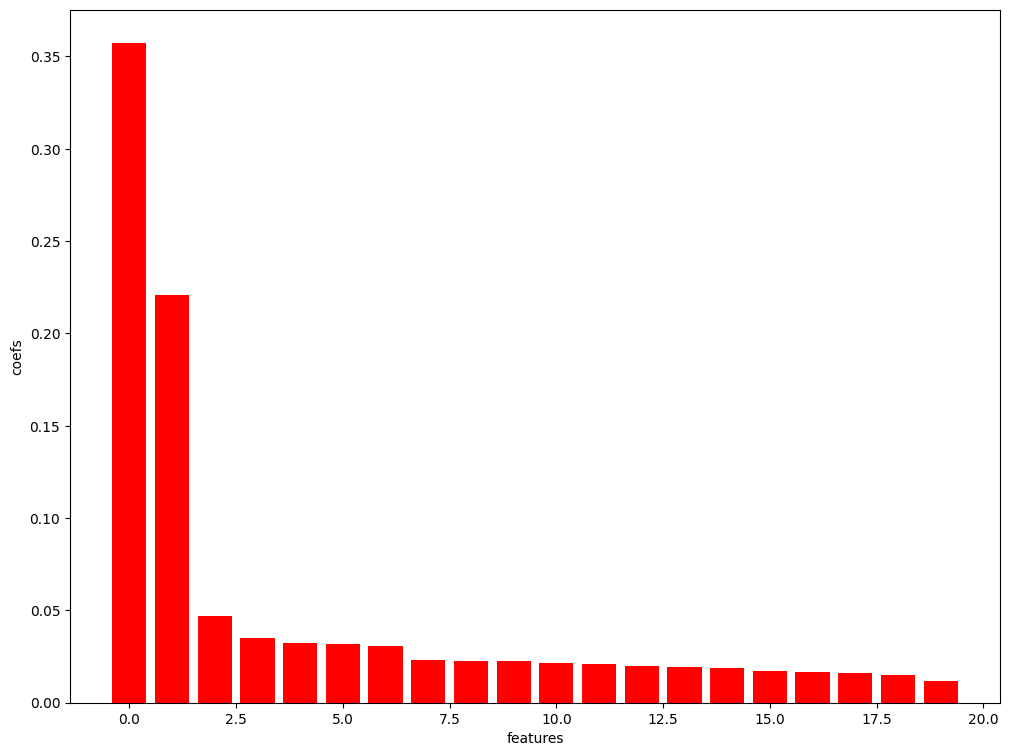

In [ ]:
plt.figure(figsize = (12,9))
plt.bar(np.arange(len(rfc.feature_importances_)), sorted(rfc.feature_importances_, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs');

Вижу, что случайный лес определил 2 наиболее важных признака, с помощью RFE оставлю эти 2 самых важных признака

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
selector = RFE(rfc, n_features_to_select=3)
selector = selector.fit(X, y)
X_rf = selector.transform(X)

Повторю п. 2 на отобранных признаках в предыдущих пунктах

In [ ]:
#Признаки отобранные с помощью регуляризации L1

cross_val_score(LogisticRegression(), X_l1reg, y_data_generated, scoring='accuracy').mean()

0.93

In [ ]:
#Признаки отобранные с помощью SelectFromModel

cross_val_score(LogisticRegression(), X_sfm, y_data_generated, scoring='accuracy').mean()

0.93

In [ ]:
#Признаки отобранные с помощью RFE из случайного леса по важности признаков

cross_val_score(LogisticRegression(), X_rf, y_data_generated, scoring='accuracy').mean()

0.9199999999999999

**6. Осуществлю перебор признаков с помощью метода SequentialFeatureSelector**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

CPU times: user 22 µs, sys: 0 ns, total: 22 µs
Wall time: 27.9 µs


In [ ]:
%%time
sfs_forward = SequentialFeatureSelector(LogisticRegression(),n_features_to_select=5, direction='forward')
sfs_forward.fit(X,y)

X_sfs = sfs_forward.transform(X)

CPU times: user 4.24 s, sys: 28.6 ms, total: 4.27 s
Wall time: 4.8 s


Повторю п. 2 на отобранных признаках

In [ ]:
#Признаки отобранные с помощью метода SequentialFeatureSelector

cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='accuracy').mean()

0.96

**7. Итоги**

In [ ]:
#Сформирую словарь для датафрейма с результатами

method_dict = {
    'default' : ['default', len(X.columns), cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()],
    'correlation': ['correlation', len(X_corr.columns), cross_val_score(LogisticRegression(), X_corr.values, y_data_generated, scoring='accuracy').mean()],
    'variation': ['variation', len(X_var.columns), cross_val_score(LogisticRegression(), X_var.values, y_data_generated, scoring='accuracy').mean()],
    'SelectKBest': ['SelectKBest', len(X_fclassif[0]), cross_val_score(LogisticRegression(), X_fclassif, y_data_generated, scoring='accuracy').mean()],
    'L1_reg': ['L1_reg', len(X_l1reg.columns), cross_val_score(LogisticRegression(), X_l1reg, y_data_generated, scoring='accuracy').mean()],
    'SelectFromModel': ['SelectFromModel', len(X_sfm[0]), cross_val_score(LogisticRegression(), X_sfm, y_data_generated, scoring='accuracy').mean()],
    'RandomForest': ['RandomForest', len(X_rf[0]), cross_val_score(LogisticRegression(), X_rf, y_data_generated, scoring='accuracy').mean()],
    'SequentialFeatureSelector': ['SequentialFeatureSelector', len(X_sfs[0]), cross_val_score(LogisticRegression(), X_sfs, y_data_generated, scoring='accuracy').mean()]
}

In [ ]:
results = pd.DataFrame(list(method_dict.values()), columns = ['Метод', 'Кол-во признаков', 'Средняя точность модели'])
results

,Метод,Кол-во признаков,Средняя точность модели
0,default,20,0.90
1,correlation,3,0.93
2,variation,3,0.92
3,SelectKBest,5,0.91
4,L1_reg,7,0.93
5,SelectFromModel,5,0.93
6,RandomForest,6,0.92
7,SequentialFeatureSelector,5,0.96


В ходе работы были исследованы различные способы по нахождению наиболее полезных признаков для модели. Наилучший результат показал метод SequentialFeatureSelector